# LoRA Injection into SAM

In [1]:
# Step 0 : Import necessary libraries
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

from src.step2_ndvivariance import load_all_data
from src.superpixels_temporal import run_temporal_superpixels
from src.generate_vanilla_prompts import generate_vanilla_centroid_prompts
from src.config import TEMPORAL_PROMPTS_DIR, VECTOR_DIR



In [2]:
#Step 1: Load Datset
# Load dataset
dataset = load_all_data()
limited_dataset = dataset[:10]  # First 10 images



[Step-0] Image 1022: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0545
[Step-0] Image 1023: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0160
[Step-0] Image 1024: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0439
[Step-0] Image 1027: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0587
[Step-0] Image 1028: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0463
[Step-0] Image 1029: NDVI time-series loaded (T=6) | NDVI variance threshold=0.1050
[Step-0] Image 1031: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0850
[Step-0] Image 1032: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0618
[Step-0] Image 1099: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0321
[Step-0] Image 1100: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0355
[Step-0] Image 1101: NDVI time-series loaded (T=6) | NDVI variance threshold=0.0923
[Step-0] Image 1103: NDVI time-series loaded (T=6) | NDVI variance threshold

# Step 2: Generate bounded vanilla prompts
generate_vanilla_centroid_prompts(dataset)

In [3]:
# Step 3: Generate bounded temporal prompts
print(len(limited_dataset)) 
run_temporal_superpixels(limited_dataset)


10
📥 Loading parcel vector file...
🚀 Generating bounded temporal superpixel prompts...

Image 1022: 128 parcels → 0 prompts (top 10 per parcel)
[Temporal SPX] Saved 0 centroids → d:\project_alpha\data\results\temporal_prompts\superpixel_prompts_1022.npy
SKIP: No parcels for image 1023
Image 1024: 149 parcels → 0 prompts (top 10 per parcel)
[Temporal SPX] Saved 0 centroids → d:\project_alpha\data\results\temporal_prompts\superpixel_prompts_1024.npy
Image 1027: 156 parcels → 37 prompts (top 10 per parcel)
[Temporal SPX] Saved 37 centroids → d:\project_alpha\data\results\temporal_prompts\superpixel_prompts_1027.npy
Image 1028: 107 parcels → 70 prompts (top 10 per parcel)
[Temporal SPX] Saved 70 centroids → d:\project_alpha\data\results\temporal_prompts\superpixel_prompts_1028.npy
Image 1029: 88 parcels → 0 prompts (top 10 per parcel)
[Temporal SPX] Saved 0 centroids → d:\project_alpha\data\results\temporal_prompts\superpixel_prompts_1029.npy
Image 1031: 289 parcels → 100 prompts (top 10 p

# Step 4: NOw i want to visualize temporal prompts 
from src.visualize_prompts import visualize_temporal_prompts

print(len(limited_dataset))
visualize_temporal_prompts(limited_dataset)


# 5 Visualize Vanilla Prompts
from src.visualize_prompts import visualize_vanilla_prompts
visualize_vanilla_prompts(limited_dataset)

# 6 Visualize_vanilla_and_temporal_prompts
from src.visualize_prompts import visualize_vanilla_vs_temporal
visualize_vanilla_vs_temporal(limited_dataset)

Available variables in NL_1022.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1024.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1027.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Image 1027: Vanilla coverage 100.0%, Temporal coverage 100.0%


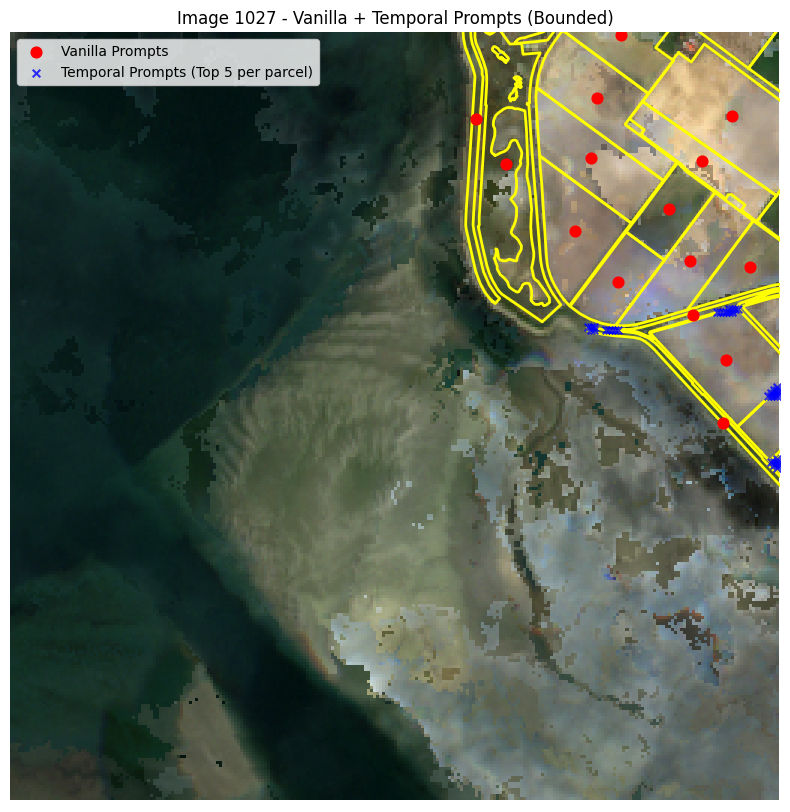

Available variables in NL_1028.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Image 1028: Vanilla coverage 100.0%, Temporal coverage 100.0%


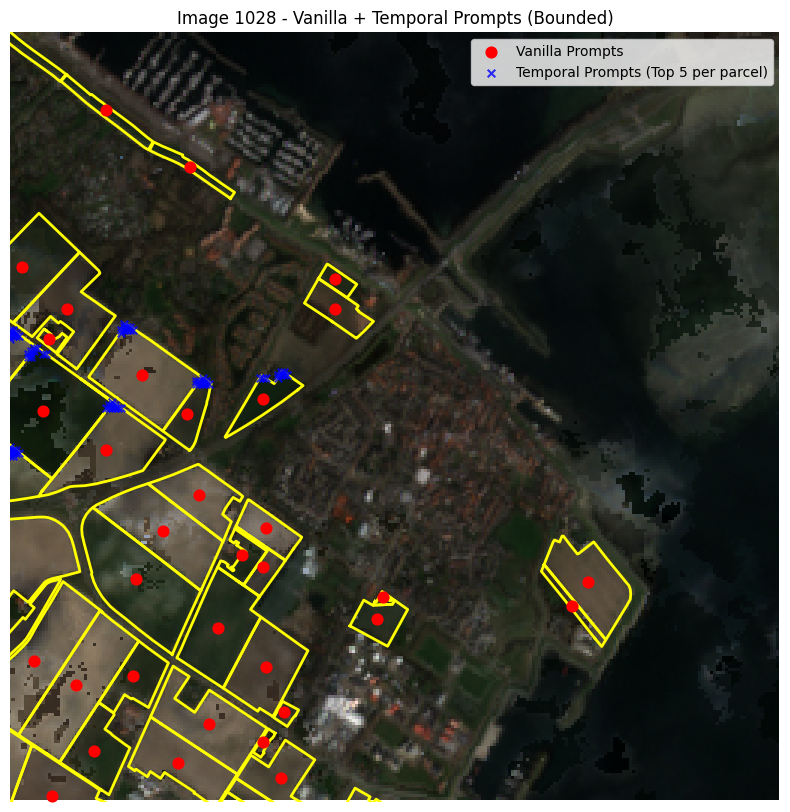

Available variables in NL_1029.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1031.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Image 1031: Vanilla coverage 95.5%, Temporal coverage 100.0%


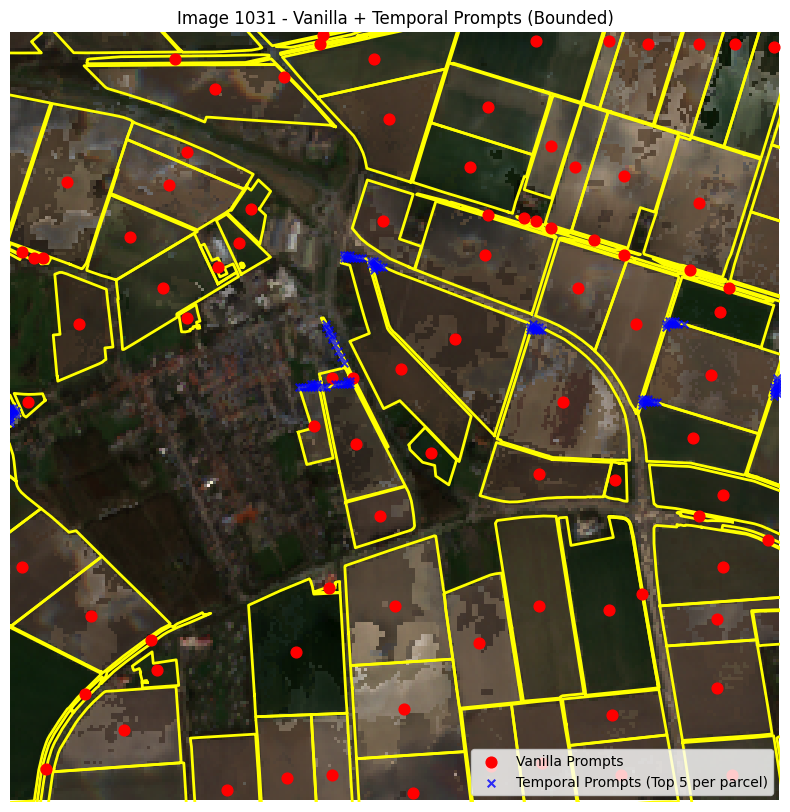

Available variables in NL_1032.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Image 1032: Vanilla coverage 80.0%, Temporal coverage 100.0%


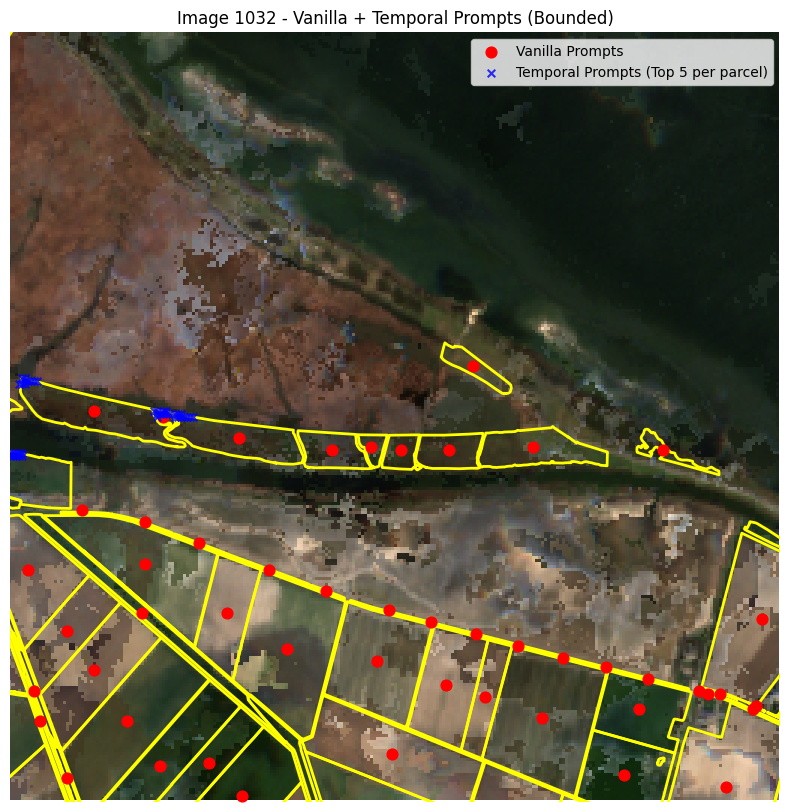

Available variables in NL_1099.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
✅ Visualized 4 images.


In [4]:
# 7 Visualize vanilla and temporal combined 
from src.visualize_prompts import visualize_vanilla_and_temporal_prompts
visualize_vanilla_and_temporal_prompts(limited_dataset)

In [ ]:
# ============================================
#  run: LoRA training (20 epoch, dataset)
# ============================================

from src.lora_train import train_lora
from src.config import TEMPORAL_PROMPTS_DIR

# ---- Run LoRA training ----
train_lora(
    dataset=dataset,
    temporal_prompt_dir=TEMPORAL_PROMPTS_DIR,
    epochs=20,
    lr=1e-4,
    device="cuda",
    save_final=True,
    checkpoint_interval=5,
    resume_ckpt=None  # Set to a checkpoint path if resuming
)

print("✅ LoRA training finished")


D:\segment-anything\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


[LoRA] Trainable params: 94,208
[DEBUG] CUDA available: True
[DEBUG] SAM device: cuda:0
[DEBUG] Trainable LoRA params: 94208

[LoRA] Epoch 1/40
  → Image 1022 (1/100)
Available variables in NL_1022.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Image 1024 (3/100)
Available variables in NL_1024.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Image 1027 (4/100)
Available variables in NL_1027.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Image 1028 (5/100)
Available variables in NL_1028.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Image 1029 (6/100)
Available variables in NL_1029.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Image 1031 (7/100)
Available variables in NL_1031.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Image 1032 (8/100)
Available variables in NL_1032.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Image 1099 (9/100)
Available variables in NL_1099.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
  → Imag

In [6]:
from src.eval_gold_standard import evaluate

print("---- VANILLA ----")
evaluate(dataset, mode="vanilla")

print("---- NDVI ----")
evaluate(dataset, mode="ndvi")

print("---- NDVI + LoRA ----")
evaluate(dataset, mode="ndvi_lora")

---- VANILLA ----


D:\segment-anything\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


Available variables in NL_1022.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1024.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1027.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1028.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1029.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1031.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1032.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1099.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1101.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1103.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1105.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1106.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Avai

D:\segment-anything\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


[LoRA] Trainable params: 94,208
Available variables in NL_1022.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1024.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1027.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1028.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1029.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1031.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1032.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1099.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1101.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1103.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1105.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1106.nc: ['B2', 'B3', 'B4', '

D:\segment-anything\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


[LoRA] Trainable params: 94,208
Available variables in NL_1022.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']


d:\project_alpha\src\eval_gold_standard.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_state = torch.load(lora_ckpt, map_location=device)


Available variables in NL_1024.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1027.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1028.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1029.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1031.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1032.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1099.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1101.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1103.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1105.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1106.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Available variables in NL_1107.nc: ['B2', 'B3', 'B4', 'B8', 'NDVI', 'spatial_ref']
Avai

{'iou': 0.35281528128989914,
 'dice': 0.46108560995818826,
 'boundary': 0.630082458804321}